In [1]:
import higgs_dna
import awkward as ak
import coffea 
import hist
from hist import *
import matplotlib.pyplot as plt
import os
import uproot
import numpy as np


In [2]:
tth = ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/tth_M125_2018/nominal/UNTAGGED_merged.parquet")
ggh = ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/nominal/UNTAGGED_merged.parquet")
vbf = ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/vbf_M125_2018/nominal/UNTAGGED_merged.parquet")
vh = ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/vh_M125_2018/nominal/UNTAGGED_merged.parquet")
ch = ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/cH_4FS_FXFX_M125_2018/Smearing_up/UNTAGGED_merged.parquet")

In [3]:
ggh.fields

['weight_central',
 'centralObjectWeight',
 'bdt_score',
 'dZ',
 'CMS_hgg_mass',
 'event',
 'pt',
 'eta',
 'phi',
 'LeadPhoton_pt_mgg',
 'LeadPhoton_eta',
 'LeadPhoton_ScEta',
 'LeadPhoton_phi',
 'LeadPhoton_mvaID',
 'SubleadPhoton_pt_mgg',
 'SubleadPhoton_eta',
 'SubleadPhoton_ScEta',
 'SubleadPhoton_phi',
 'SubleadPhoton_mvaID',
 'LeadPhoton_pt',
 'SubleadPhoton_pt',
 'LeadPhoton_energy',
 'LeadPhoton_energyErr',
 'LeadPhoton_energyRaw',
 'SubleadPhoton_energy',
 'SubleadPhoton_energyErr',
 'SubleadPhoton_energyRaw',
 'LeadPhoton_pfChargedIsoPFPV',
 'SubleadPhoton_pfChargedIsoPFPV',
 'LeadPhoton_pfChargedIsoWorstVtx',
 'SubleadPhoton_pfChargedIsoWorstVtx',
 'LeadPhoton_pfPhoIso03',
 'SubleadPhoton_pfPhoIso03',
 'Diphoton_cos_dPhi',
 'sigmaMrv',
 'sigmaMwv',
 'PV_score',
 'nPV',
 'nPU',
 'rho',
 'n_jets',
 'first_jet_pt',
 'first_jet_eta',
 'first_jet_phi',
 'first_jet_mass',
 'first_jet_hFlav',
 'first_jet_DeepFlavour_CvsL',
 'first_jet_DeepFlavour_CvsB',
 'first_jet_particleNetAK4_C

In [4]:
samples = {
    "ggh": ggh, 
    "tth": tth, 
    "vbf": vbf, 
    "vh": vh,
    "ch": ch,
}

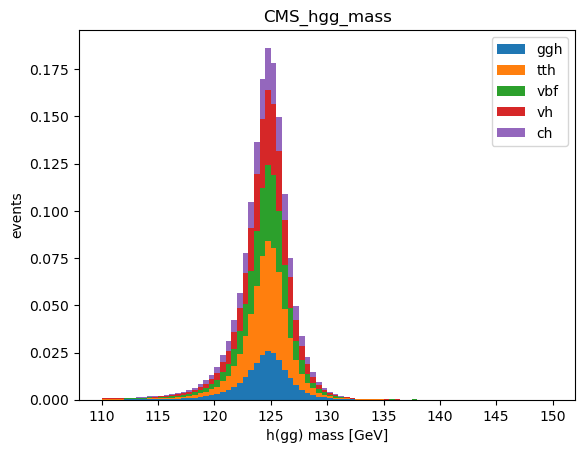

In [5]:
h_ax = hist.axis.Regular(bins=80,   start=110, stop=150, flow=False, name="ax")
h_cax = hist.axis.StrCategory([*samples], name="c")
h = Hist(h_ax, h_cax)

for s in samples:
    h.fill(ax=samples[s].CMS_hgg_mass, weight=samples[s].weight, c=s)

s_h = h.stack("c")

fig, ax = plt.subplots()
ax.set_ylabel('events')
ax.set_xlabel('h(gg) mass [GeV]')
plt.title("CMS_hgg_mass")
s_h.plot(stack=True, histtype="fill")
plt.legend()
fig.show()

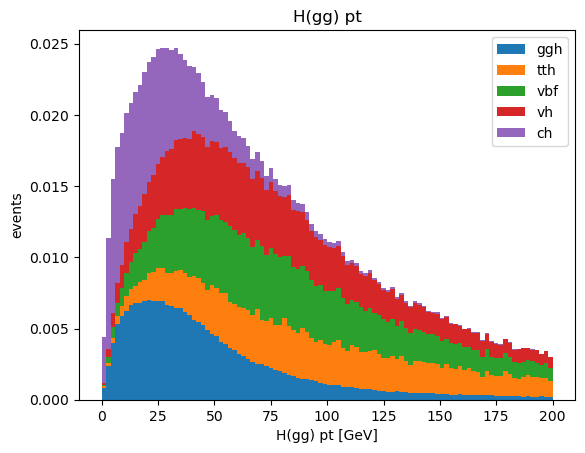

In [6]:
h_ax = hist.axis.Regular(bins=100,   start=0, stop=200, flow=False, name="ax")
h_cax = hist.axis.StrCategory([*samples], name="c")
h = Hist(h_ax, h_cax)

for s in samples:
    h.fill(ax=samples[s].pt, weight=samples[s].weight, c=s)

s_h = h.stack("c")

fig, ax = plt.subplots()
ax.set_ylabel('events')
ax.set_xlabel('H(gg) pt [GeV]')
plt.title("H(gg) pt")
s_h.plot(stack=True, histtype="fill")
plt.legend()
fig.show()

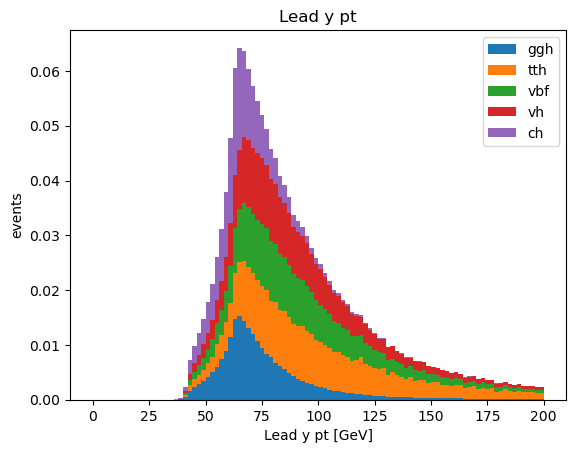

In [7]:
h_ax = hist.axis.Regular(bins=100,   start=0, stop=200, flow=False, name="ax")
h_cax = hist.axis.StrCategory([*samples], name="c")
h = Hist(h_ax, h_cax)

for s in samples:
    h.fill(ax=samples[s].LeadPhoton_pt, weight=samples[s].weight, c=s)

s_h = h.stack("c")

fig, ax = plt.subplots()
ax.set_ylabel('events')
ax.set_xlabel('Lead y pt [GeV]')
plt.title("Lead y pt")
s_h.plot(stack=True, histtype="fill")
plt.legend()
fig.show()

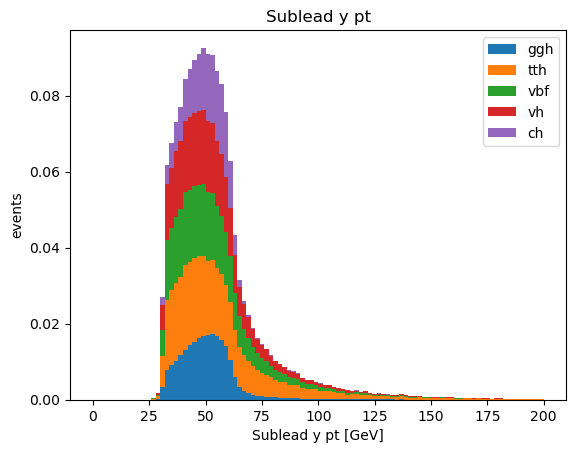

In [8]:
h_ax = hist.axis.Regular(bins=100,   start=0, stop=200, flow=False, name="ax")
h_cax = hist.axis.StrCategory([*samples], name="c")
h = Hist(h_ax, h_cax)

for s in samples:
    h.fill(ax=samples[s].SubleadPhoton_pt, weight=samples[s].weight, c=s)

s_h = h.stack("c")

fig, ax = plt.subplots()
ax.set_ylabel('events')
ax.set_xlabel('Sublead y pt [GeV]')
plt.title("Sublead y pt")
s_h.plot(stack=True, histtype="fill")
plt.legend()
fig.show()

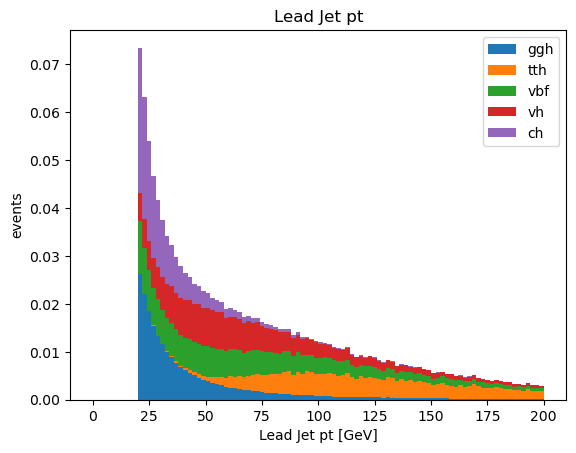

In [9]:
h_ax = hist.axis.Regular(bins=100,   start=0, stop=200, flow=False, name="ax")
h_cax = hist.axis.StrCategory([*samples], name="c")
h = Hist(h_ax, h_cax)

for s in samples:
    h.fill(ax=samples[s].first_jet_pt, weight=samples[s].weight, c=s)

s_h = h.stack("c")

fig, ax = plt.subplots()
ax.set_ylabel('events')
ax.set_xlabel('Lead Jet pt [GeV]')
plt.title("Lead Jet pt")
s_h.plot(stack=True, histtype="fill")
plt.legend()
fig.show()

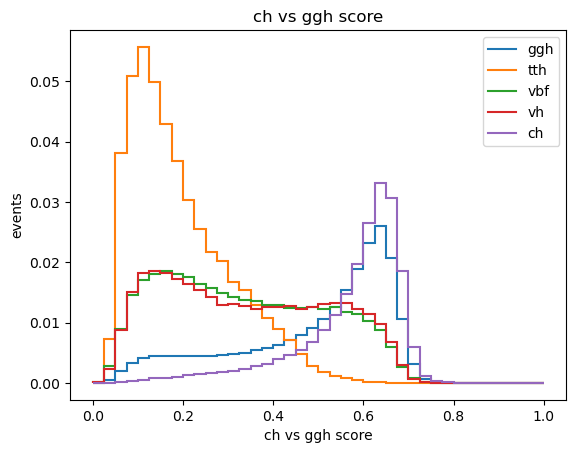

In [10]:
h_ax = hist.axis.Regular(bins=40,   start=0, stop=1, flow=False, name="ax")
h_cax = hist.axis.StrCategory([*samples], name="c")
h = Hist(h_ax, h_cax)

for s in samples:
    h.fill(ax=samples[s].ch_vs_ggh_bdt_score, weight=samples[s].weight, c=s)

s_h = h.stack("c")

fig, ax = plt.subplots()
ax.set_ylabel('events')
ax.set_xlabel('ch vs ggh score')
plt.title("ch vs ggh score")
s_h.plot(stack=False, histtype="step")
plt.legend()
fig.show()

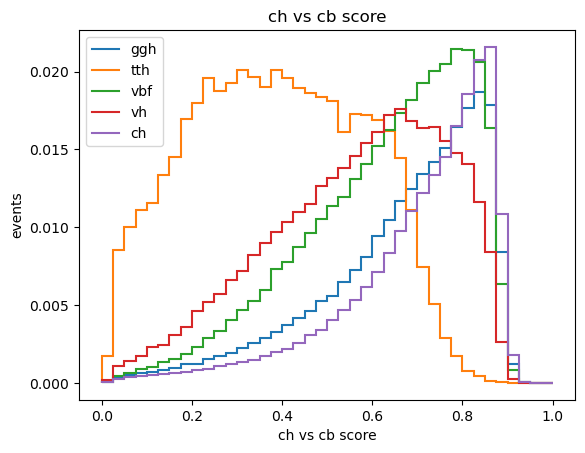

In [11]:
h_ax = hist.axis.Regular(bins=40,   start=0, stop=1, flow=False, name="ax")
h_cax = hist.axis.StrCategory([*samples], name="c")
h = Hist(h_ax, h_cax)

for s in samples:
    h.fill(ax=samples[s].ch_vs_cb_bdt_score, weight=samples[s].weight, c=s)

s_h = h.stack("c")

fig, ax = plt.subplots()
ax.set_ylabel('events')
ax.set_xlabel('ch vs cb score')
plt.title("ch vs cb score")
s_h.plot(stack=False, histtype="step")
plt.legend()
fig.show()

In [12]:
%%bash

ls -l /work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/ggh_M125_2018/Smearing_down

total 73256
-rw-r--r-- 1 bevila_t psi-pixel 12251782 Mar 11 13:55 10c6f242-c773-11ee-9ad1-717b21c0beef_%2FEvents%3B1_0-162000.parquet
-rw-r--r-- 1 bevila_t psi-pixel 16569411 Mar 11 13:57 11b86e24-c773-11ee-b74e-717b21c0beef_%2FEvents%3B1_0-220000.parquet
-rw-r--r-- 1 bevila_t psi-pixel 13562012 Mar 11 13:56 796c2196-c773-11ee-b85a-777b21c0beef_%2FEvents%3B1_0-180000.parquet
-rw-r--r-- 1 bevila_t psi-pixel 18660162 Mar 11 13:55 7a6d7d88-c773-11ee-9bca-6f7b21c0beef_%2FEvents%3B1_0-250000.parquet
-rw-r--r-- 1 bevila_t psi-pixel  1515158 Mar 11 13:41 be41de60-c772-11ee-a638-777b21c0beef_%2FEvents%3B1_0-18000.parquet
-rw-r--r-- 1 bevila_t psi-pixel 12821153 Mar 11 13:55 e9957ab8-c772-11ee-acec-707b21c0beef_%2FEvents%3B1_0-170000.parquet


In [16]:
variations = {
    "nominal" : {
        "tag0": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/nominal/UNTAGGED_merged.parquet"),
        },
    "scale_up" : {
        "tag0": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/Scale_up/UNTAGGED_merged.parquet"),
        },
    "scale_down" : {
        "tag0": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/Scale_down/UNTAGGED_merged.parquet"),
        },
    "smear_up" : {
        "tag0": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/Smearing_up/UNTAGGED_merged.parquet"),
        },
    "smear_down" : {
        "tag0": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/Smearing_down/UNTAGGED_merged.parquet"),
        },
    "fnuf_up" : {
        "tag0": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/FNUF_up/UNTAGGED_merged.parquet"),
        },
    "fnuf_down" : {
        "tag0": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/FNUF_down/UNTAGGED_merged.parquet"),
        },
    "material_up" : {
        "tag0": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/Material_up/UNTAGGED_merged.parquet"),
        },
    "material_down" : {
        "tag0": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/Material_down/UNTAGGED_merged.parquet"),
        },
    "shower_up" : {
        "tag0": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/ShowerShape_up/UNTAGGED_merged.parquet"),
        },
    "shower_down" : {
        "tag0": ak.from_parquet("/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/dev/higgs-dna-tiziano-bevilacqua/output/output_2018_no_trigger_110324/merged/ggh_M125_2018/ShowerShape_down/UNTAGGED_merged.parquet"),
        }
}

In [17]:
variations["nominal"]["tag0"].fields

['weight_central',
 'centralObjectWeight',
 'bdt_score',
 'dZ',
 'CMS_hgg_mass',
 'event',
 'pt',
 'eta',
 'phi',
 'LeadPhoton_pt_mgg',
 'LeadPhoton_eta',
 'LeadPhoton_ScEta',
 'LeadPhoton_phi',
 'LeadPhoton_mvaID',
 'SubleadPhoton_pt_mgg',
 'SubleadPhoton_eta',
 'SubleadPhoton_ScEta',
 'SubleadPhoton_phi',
 'SubleadPhoton_mvaID',
 'LeadPhoton_pt',
 'SubleadPhoton_pt',
 'LeadPhoton_energy',
 'LeadPhoton_energyErr',
 'LeadPhoton_energyRaw',
 'SubleadPhoton_energy',
 'SubleadPhoton_energyErr',
 'SubleadPhoton_energyRaw',
 'LeadPhoton_pfChargedIsoPFPV',
 'SubleadPhoton_pfChargedIsoPFPV',
 'LeadPhoton_pfChargedIsoWorstVtx',
 'SubleadPhoton_pfChargedIsoWorstVtx',
 'LeadPhoton_pfPhoIso03',
 'SubleadPhoton_pfPhoIso03',
 'Diphoton_cos_dPhi',
 'sigmaMrv',
 'sigmaMwv',
 'PV_score',
 'nPV',
 'nPU',
 'rho',
 'n_jets',
 'first_jet_pt',
 'first_jet_eta',
 'first_jet_phi',
 'first_jet_mass',
 'first_jet_hFlav',
 'first_jet_DeepFlavour_CvsL',
 'first_jet_DeepFlavour_CvsB',
 'first_jet_particleNetAK4_C

(115.0, 135.0)

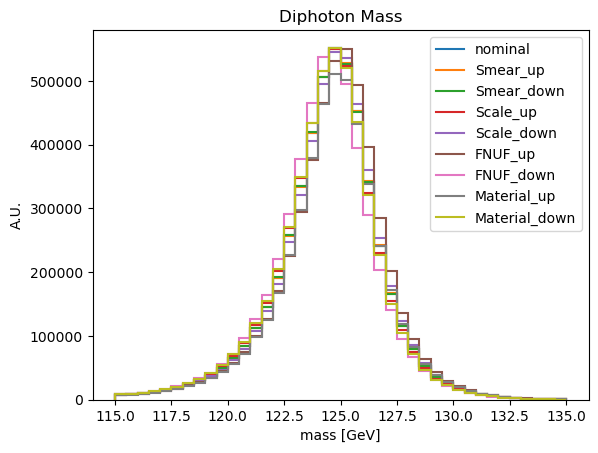

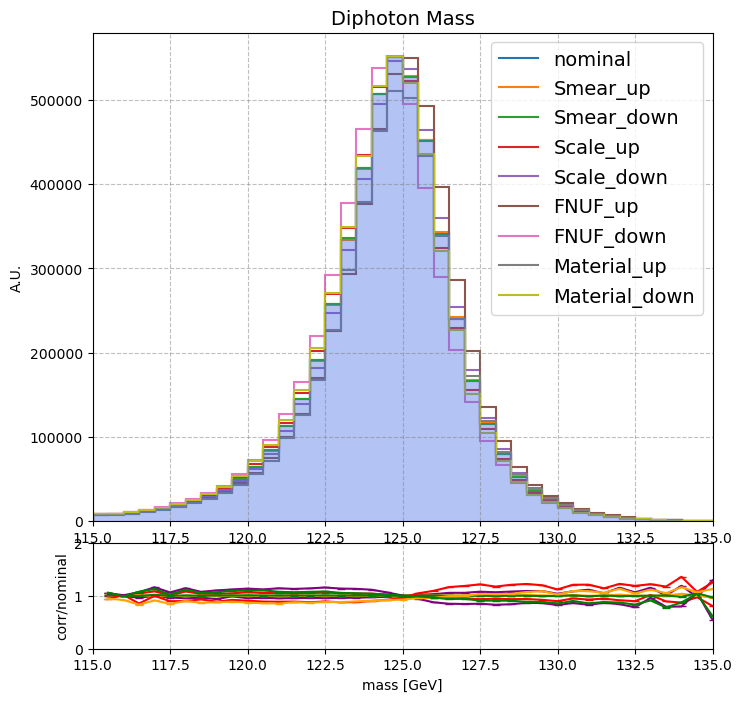

In [19]:
nbins = 40
h_ax = hist.axis.Regular(bins=nbins,   start=115, stop=135, flow=False, name="ax")
h_cax = hist.axis.StrCategory(["nominal", "Smear_up", "Smear_down", "Scale_up", "Scale_down", "FNUF_up", "FNUF_down", "Material_up", "Material_down"], name="c")
h = Hist(h_ax, h_cax)
var="CMS_hgg_mass"
for tag in range (1):
    h.fill(ax=variations["nominal"][f"tag{tag}"][var], weight=variations["nominal"][f"tag{tag}"].weight_nominal, c="nominal")
    h.fill(ax=variations["smear_up"][f"tag{tag}"][var], weight=variations["smear_up"][f"tag{tag}"].weight_nominal, c="Smear_up")
    h.fill(ax=variations["smear_down"][f"tag{tag}"][var], weight=variations["smear_down"][f"tag{tag}"].weight_nominal, c="Smear_down")
    h.fill(ax=variations["scale_up"][f"tag{tag}"][var], weight=variations["scale_up"][f"tag{tag}"].weight_nominal, c="Scale_up")
    h.fill(ax=variations["scale_down"][f"tag{tag}"][var], weight=variations["scale_down"][f"tag{tag}"].weight_nominal, c="Scale_down")
    h.fill(ax=variations["fnuf_up"][f"tag{tag}"][var], weight=variations["fnuf_up"][f"tag{tag}"].weight_nominal, c="FNUF_up")
    h.fill(ax=variations["fnuf_down"][f"tag{tag}"][var], weight=variations["fnuf_down"][f"tag{tag}"].weight_nominal, c="FNUF_down")
    h.fill(ax=variations["material_up"][f"tag{tag}"][var], weight=variations["material_up"][f"tag{tag}"].weight_nominal, c="Material_up")
    h.fill(ax=variations["material_down"][f"tag{tag}"][var], weight=variations["material_down"][f"tag{tag}"].weight_nominal, c="Material_down")

s_h = h.stack("c")

fig, ax = plt.subplots()
ax.set_ylabel('A.U.')
ax.set_xlabel('mass [GeV]')
plt.title("Diphoton Mass")
s_h.plot(stack=False, histtype="step")
plt.legend()
fig.show()

# plot it
#print(full_hist)
fig = plt.figure(figsize=(8, 8))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

s_h.plot(ax=ax0, stack=False, histtype="step")
h[:, "nominal"].plot(
    histtype="fill",
    color="royalblue",
    alpha=0.4,
)
 
ax0.set_ylabel('A.U.')

ax0.set_title('Diphoton Mass', fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)


ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.set_ylabel('corr/nominal')
ax1.set_xlabel('mass [GeV]')

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

mc["bins"]["nominal"] = h[:, "nominal"].to_numpy()[0]
mc["edges"]["nominal"] = h[:, "nominal"].to_numpy()[1] + 0.5
mc["bins"]["Scale_up"] = h[:, "Scale_up"].to_numpy()[0]
mc["edges"]["Scale_up"] = h[:, "Scale_up"].to_numpy()[1] + 0.5
mc["bins"]["Scale_down"] = h[:, "Scale_down"].to_numpy()[0]
mc["edges"]["Scale_down"] = h[:, "Scale_down"].to_numpy()[1] + 0.5
mc["bins"]["Smear_up"] = h[:, "Smear_up"].to_numpy()[0]
mc["edges"]["Smear_up"] = h[:, "Smear_up"].to_numpy()[1] + 0.5
mc["bins"]["Smear_down"] = h[:, "Smear_down"].to_numpy()[0]
mc["edges"]["Smear_down"] = h[:, "Smear_down"].to_numpy()[1] + 0.5
mc["bins"]["FNUF_up"] = h[:, "FNUF_up"].to_numpy()[0]
mc["edges"]["FNUF_up"] = h[:, "FNUF_up"].to_numpy()[1] + 0.5
mc["bins"]["FNUF_down"] = h[:, "FNUF_down"].to_numpy()[0]
mc["edges"]["FNUF_down"] = h[:, "FNUF_down"].to_numpy()[1] + 0.5
mc["bins"]["Material_up"] = h[:, "Material_up"].to_numpy()[0]
mc["edges"]["Material_up"] = h[:, "Material_up"].to_numpy()[1] + 0.5
mc["bins"]["Material_down"] = h[:, "Material_down"].to_numpy()[0]
mc["edges"]["Material_down"] = h[:, "Material_down"].to_numpy()[1] + 0.5

ax0.legend(prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)
ax1.grid(color='grey', linestyle='--', alpha=0.5)
mc["bins"]["nominal"] = ak.where(
    mc["bins"]["nominal"] != 0,
    mc["bins"]["nominal"],
    ak.ones_like(mc["bins"]["nominal"])
)

ax1.errorbar(mc["edges"]["nominal"][:-1], mc["bins"]["nominal"]/mc["bins"]["nominal"], color="grey", marker="_", linestyle="", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["Scale_up"]/mc["bins"]["nominal"], color="red", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["Scale_down"]/mc["bins"]["nominal"], color="purple", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["Smear_up"]/mc["bins"]["nominal"], color="orange", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["Smear_down"]/mc["bins"]["nominal"], color="green", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["FNUF_up"]/mc["bins"]["nominal"], color="red", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["FNUF_down"]/mc["bins"]["nominal"], color="purple", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["Material_up"]/mc["bins"]["nominal"], color="orange", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["Material_down"]/mc["bins"]["nominal"], color="green", marker="_", linestyle="-", label="mc")
# ax1.fill_between(mc["edges"]["tot"][:-1], mc["bins"]["tot"]/mc["bins"]["tot"]-mc["errs"]["tot"]/mc["bins"]["tot"], mc["bins"]["tot"]/mc["bins"]["tot"] + mc["errs"]["tot"]/mc["bins"]["tot"], facecolor='grey', alpha=0.4)


# center the bins
half_bin = np.abs((mc["edges"]["nominal"][1] - mc["edges"]["nominal"][0])) / 2
ax1.set_ylim([0,2])
ax1.set_xlim([115,135])
ax0.set_xlim([115,135])

(0.0, 200.0)

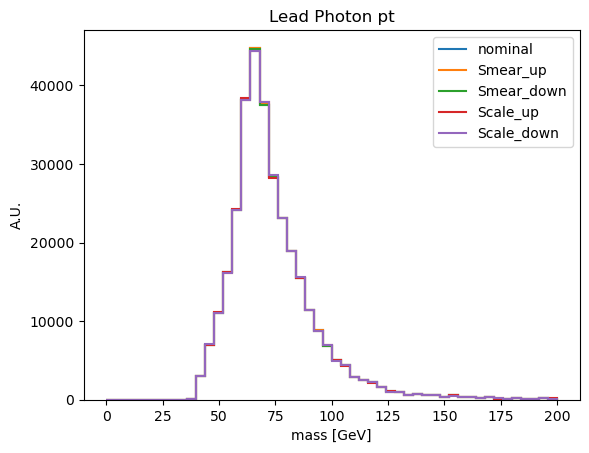

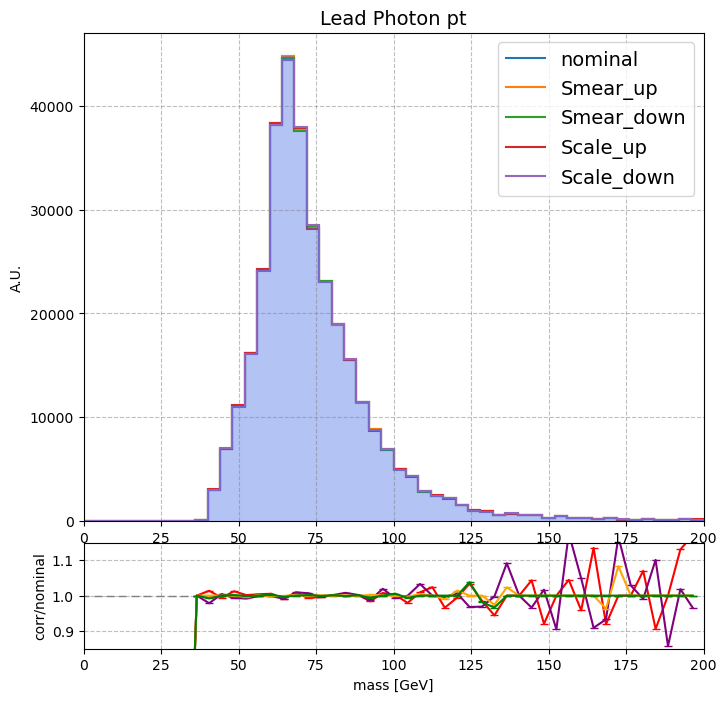

In [198]:
nbins = 50
h_ax = hist.axis.Regular(bins=nbins,   start=0, stop=200, flow=False, name="ax")
h_cax = hist.axis.StrCategory(["nominal", "Smear_up", "Smear_down", "Scale_up", "Scale_down"], name="c")
h = Hist(h_ax, h_cax)
var="LeadPhoton_pt"
title='Lead Photon pt'
for tag in range (9):
    h.fill(ax=nominal[f"tag{tag}"][var], weight=nominal[f"tag{tag}"].weight_nominal, c="nominal")
    h.fill(ax=smear_up[f"tag{tag}"][var], weight=smear_up[f"tag{tag}"].weight_nominal, c="Smear_up")
    h.fill(ax=smear_down[f"tag{tag}"][var], weight=smear_down[f"tag{tag}"].weight_nominal, c="Smear_down")
    h.fill(ax=scale_up[f"tag{tag}"][var], weight=scale_up[f"tag{tag}"].weight_nominal, c="Scale_up")
    h.fill(ax=scale_down[f"tag{tag}"][var], weight=scale_down[f"tag{tag}"].weight_nominal, c="Scale_down")

s_h = h.stack("c")

fig, ax = plt.subplots()
ax.set_ylabel('A.U.')
ax.set_xlabel('mass [GeV]')
plt.title(title)
s_h.plot(stack=False, histtype="step")
plt.legend()
fig.show()

# plot it
#print(full_hist)
fig = plt.figure(figsize=(8, 8))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

s_h.plot(ax=ax0, stack=False, histtype="step")
h[:, "nominal"].plot(
    histtype="fill",
    color="royalblue",
    alpha=0.4,
)
 
ax0.set_ylabel('A.U.')

ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)


ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.set_ylabel('corr/nominal')
ax1.set_xlabel('mass [GeV]')

mc= {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

mc["bins"]["nominal"] = h[:, "nominal"].to_numpy()[0]
mc["edges"]["nominal"] = h[:, "nominal"].to_numpy()[1] + 0.5
mc["bins"]["Scale_up"] = h[:, "Scale_up"].to_numpy()[0]
mc["edges"]["Scale_up"] = h[:, "Scale_up"].to_numpy()[1] + 0.5
mc["bins"]["Scale_down"] = h[:, "Scale_down"].to_numpy()[0]
mc["edges"]["Scale_down"] = h[:, "Scale_down"].to_numpy()[1] + 0.5
mc["bins"]["Smear_up"] = h[:, "Smear_up"].to_numpy()[0]
mc["edges"]["Smear_up"] = h[:, "Smear_up"].to_numpy()[1] + 0.5
mc["bins"]["Smear_down"] = h[:, "Smear_down"].to_numpy()[0]
mc["edges"]["Smear_down"] = h[:, "Smear_down"].to_numpy()[1] + 0.5

ax0.legend(prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)
ax1.grid(color='grey', linestyle='--', alpha=0.5)
mc["bins"]["nominal"] = ak.where(
    mc["bins"]["nominal"] != 0,
    mc["bins"]["nominal"],
    ak.ones_like(mc["bins"]["nominal"])
)

ax1.errorbar(mc["edges"]["nominal"][:-1], mc["bins"]["nominal"]/mc["bins"]["nominal"], color="grey", marker="_", linestyle="", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["Scale_up"]/mc["bins"]["nominal"], color="red", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["Scale_down"]/mc["bins"]["nominal"], color="purple", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["Smear_up"]/mc["bins"]["nominal"], color="orange", marker="_", linestyle="-", label="mc")
ax1.errorbar(mc["edges"]["Scale_up"][:-1], mc["bins"]["Smear_down"]/mc["bins"]["nominal"], color="green", marker="_", linestyle="-", label="mc")
# ax1.fill_between(mc["edges"]["tot"][:-1], mc["bins"]["tot"]/mc["bins"]["tot"]-mc["errs"]["tot"]/mc["bins"]["tot"], mc["bins"]["tot"]/mc["bins"]["tot"] + mc["errs"]["tot"]/mc["bins"]["tot"], facecolor='grey', alpha=0.4)


# center the bins
half_bin = np.abs((mc["edges"]["nominal"][1] - mc["edges"]["nominal"][0])) / 2
ax1.set_ylim([0.85,1.15])
ax1.set_xlim([0,200])
ax0.set_xlim([0,200])